In [7]:
!wget https://datahack-prod.s3.amazonaws.com/train_file/train_LZdllcl.csv -O train.csv

--2018-09-15 10:54:20--  https://datahack-prod.s3.amazonaws.com/train_file/train_LZdllcl.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.0
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3759647 (3.6M) [application/vnd.ms-excel]
Saving to: ‘train.csv’

train.csv           100%[=====================>]   3.58M   417KB/s   in 25s    

2018-09-15 10:54:45 (149 KB/s) - ‘train.csv’ saved [3759647/3759647]



In [8]:
!wget https://datahack-prod.s3.amazonaws.com/test_file/test_2umaH9m.csv -O test.csv

--2018-09-15 10:54:46--  https://datahack-prod.s3.amazonaws.com/test_file/test_2umaH9m.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.32
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1565147 (1.5M) [application/vnd.ms-excel]
Saving to: ‘test.csv’

test.csv            100%[=====================>]   1.49M   160KB/s   in 18s    

2018-09-15 10:55:05 (85.7 KB/s) - ‘test.csv’ saved [1565147/1565147]



In [9]:
!wget https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_M0L0uXE.csv -O sample_submission.csv

--2018-09-15 10:55:05--  https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_M0L0uXE.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.20
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208067 (203K) [application/vnd.ms-excel]
Saving to: ‘sample_submission.csv’

sample_submission.c 100%[=====================>] 203.19K  42.1KB/s   in 4.8s   

2018-09-15 10:55:11 (42.1 KB/s) - ‘sample_submission.csv’ saved [208067/208067]



In [10]:
# Import the required packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [11]:
# Read the train and test data
train=pd.read_csv("train.csv")
train.drop('employee_id',inplace=True,axis = 1)
test=pd.read_csv("test.csv")

In [12]:
# Check the variables in train data
train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [13]:
# Print datatype of each variable
train.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [14]:
# Dimension of the train dataset
train.shape

(54808, 13)

In [15]:
# Print the head of train dataset
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [16]:
# Unique values in each variable of train dataset
train.nunique()

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating     5
length_of_service       35
KPIs_met >80%            2
awards_won?              2
avg_training_score      61
is_promoted              2
dtype: int64

### Univariate Analysis

#### Target Variable

In [17]:
train['is_promoted'].value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

In [18]:
# Around 91% trainee have promoted
# Unbalanced dataset 

#### Categorical Independent Variables

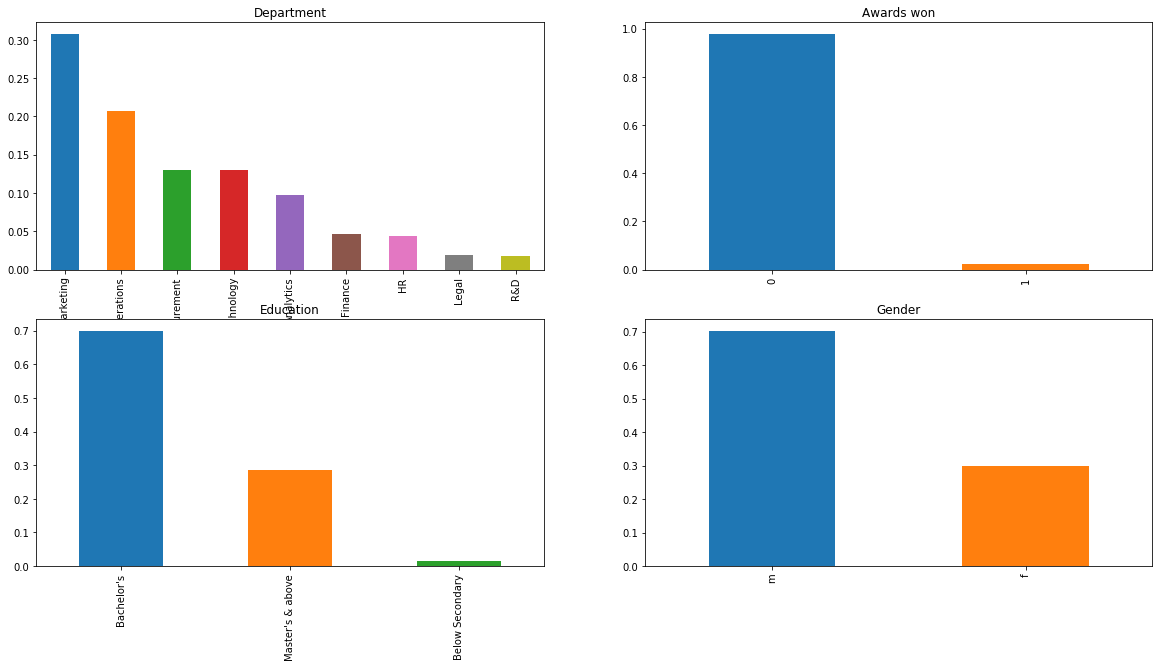

In [19]:
plt.figure(1)
plt.subplot(221)
train['department'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Department')

plt.subplot(222)
train['awards_won?'].value_counts(normalize=True).plot.bar(title= 'Awards won')

plt.subplot(223)
train['education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(224)
train['gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

plt.show()

In [20]:
# Most of the trainee are enrolled for Y and T program_type.
# More number of trainee enrolment for offline test than online test.
# Most of the test are easy in terms of difficulty level.

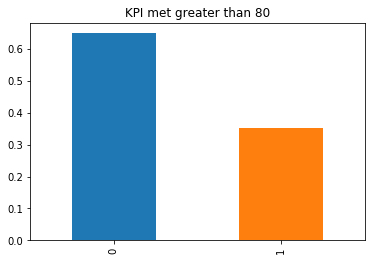

In [21]:
train['KPIs_met >80%'].value_counts(normalize=True).plot.bar(title= 'KPI met greater than 80')


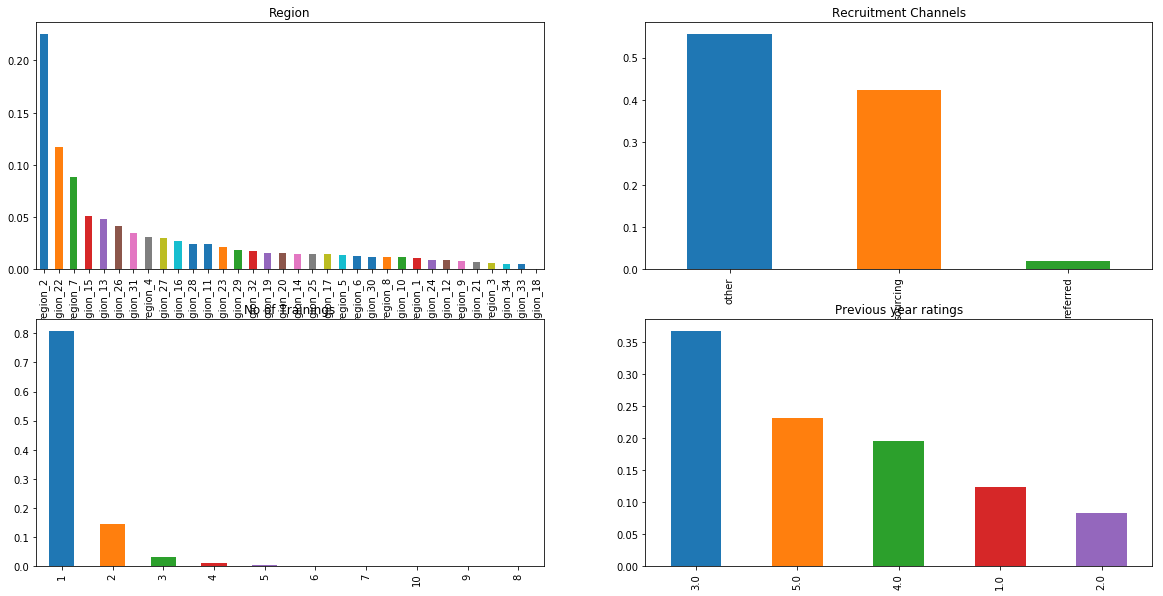

In [22]:
plt.figure(1)
plt.subplot(221)
train['region'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Region')

plt.subplot(222)
train['recruitment_channel'].value_counts(normalize=True).plot.bar(title='Recruitment Channels')

plt.subplot(223)
train['no_of_trainings'].value_counts(normalize=True).plot.bar(title= 'No of Trainings')

plt.subplot(224)
train['previous_year_rating'].value_counts(normalize=True).plot.bar(title= 'Previous year ratings')

plt.show()

In [23]:
# More male trainee as compared to female trainee
# Most of the trainee have diploma
# Most of the trainee belongs to tier 3 city
# 10% of the trainee are handicapped

#### Numerical Independent Variables

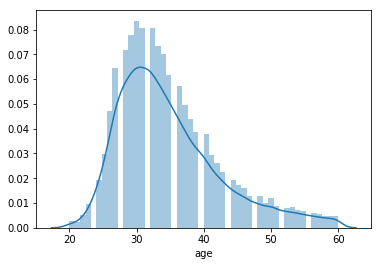

In [24]:
sns.distplot(train['age']);

In [25]:
# Most of the trainee are in the age range of 20-30 and 40-50

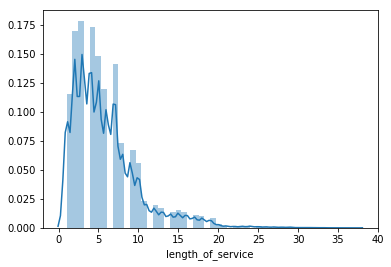

In [26]:
sns.distplot(train['length_of_service']);

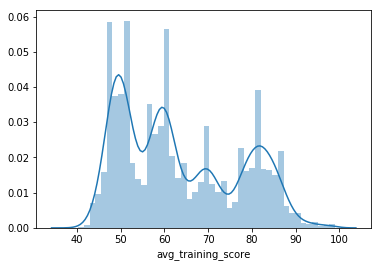

In [27]:
sns.distplot(train['avg_training_score']);

### Bivariate Analysis

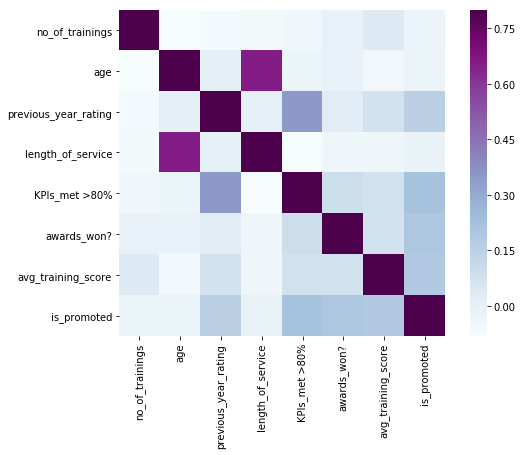

In [28]:
# Correlation between numerical variables
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [29]:
# Not much correlation between the variables

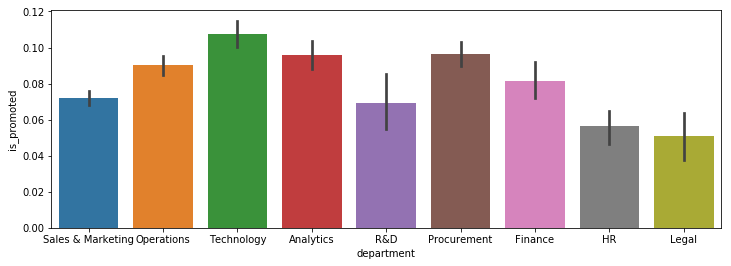

In [30]:
# program_id vs is_pass
plt.figure(figsize=(12,4))
sns.barplot(train['department'], train['is_promoted'])

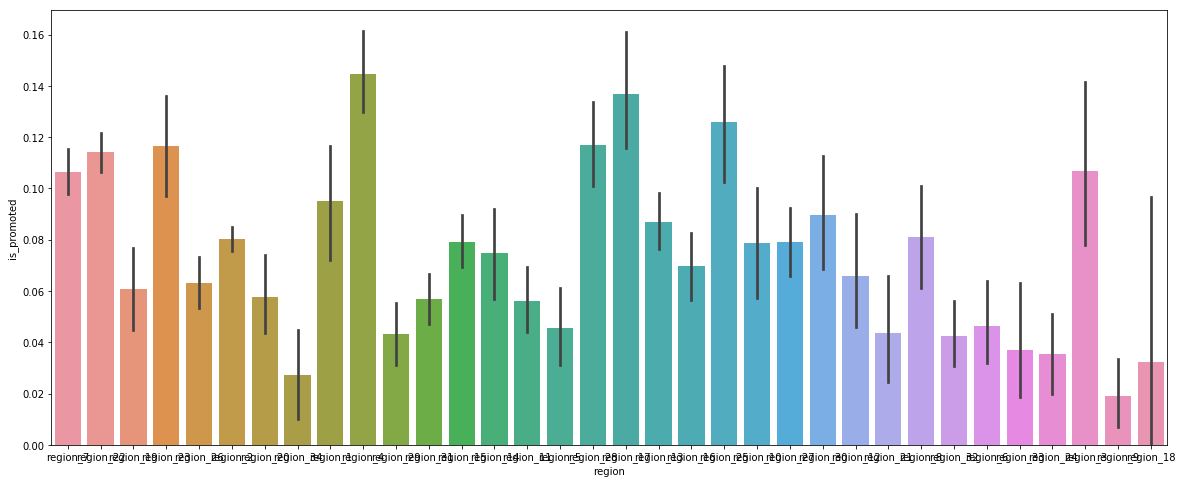

In [32]:
plt.figure(figsize=(20,8))
# program_type vs is_pass
sns.barplot(train['region'], train['is_promoted'])

In [33]:
# Trainee in X and Y program type have higher chances to pass the test

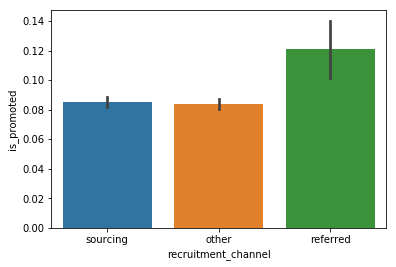

In [34]:
# test_type vs is_pass
sns.barplot(train['recruitment_channel'], train['is_promoted'])

In [35]:
# Trainee attending online mode of test have higher chances to pass the test

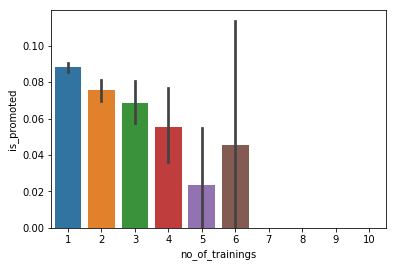

In [37]:
# difficulty_level vs is_pass
sns.barplot(train['no_of_trainings'], train['is_promoted'])

In [36]:
# If the difficulty level of the test is easy, chances to pass the test are higher

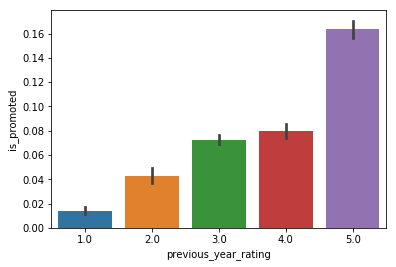

In [38]:
# Gender vs is_pass
sns.barplot(train['previous_year_rating'], train['is_promoted'])

In [39]:
# Gender does not affect the chances to pass the test

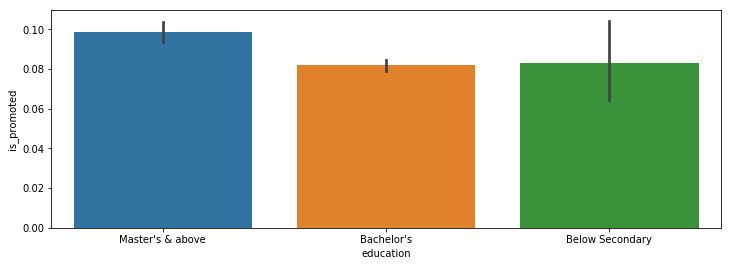

In [40]:
# education vs is_pass
plt.figure(figsize=(12,4))
sns.barplot(train['education'], train['is_promoted'])

In [41]:
# Trainee with Masters education level have more chances to pass the test

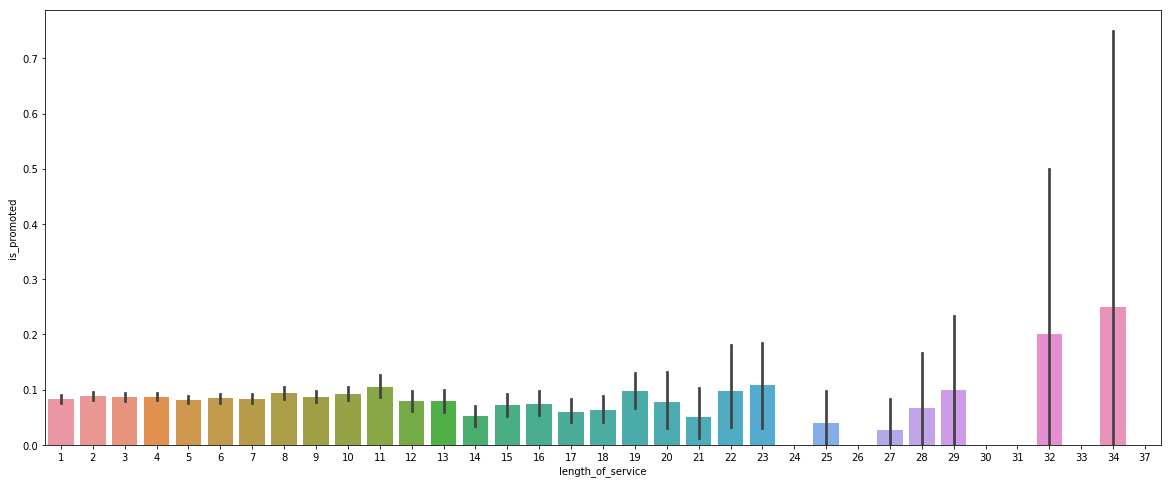

In [42]:
plt.figure(figsize=(20,8))
# is_handicapped vs is_pass
sns.barplot(train['length_of_service'], train['is_promoted'])

In [43]:
# Handicapped trainee have less chances to pass the test

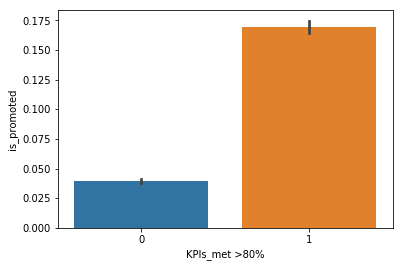

In [44]:
# city_tier vs is_pass
sns.barplot(train['KPIs_met >80%'], train['is_promoted'])

In [45]:
# Trainee from city tier 1 have higher chances to pass the test

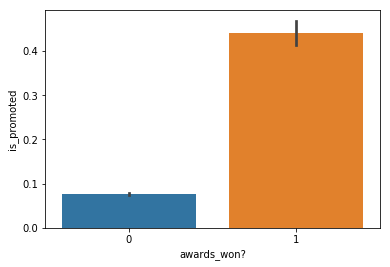

In [46]:
# trainee_engagement_rating vs is_pass
sns.barplot(train['awards_won?'], train['is_promoted'])

In [47]:
# As the trainee engagement rating increases, chances to pass the test also increases

### Missing Values Treatment

In [48]:
# Check the number of missing values in each variable
train.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [49]:
# age and trainee_engagement_rating variables have missing values in it.

In [50]:
test = pd.read_csv('test.csv')
test.drop('employee_id',inplace=True,axis = 1)
test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [51]:
test['education'].fillna('other',inplace=True)
test['previous_year_rating'].fillna(99,inplace=True)

train['education'].fillna('other',inplace=True)
train['previous_year_rating'].fillna(99,inplace=True)

### Logistic Regression

In [52]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [53]:
# Save target variable in separate dataset
X = train.drop('is_promoted',axis=1)
y = train.is_promoted

In [54]:
test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,99.0,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [55]:
# Apply dummies to the dataset
X=pd.get_dummies(X)
test=pd.get_dummies(test)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from mlens.ensemble import SuperLearner
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [64]:
#splitting into test/train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [73]:
ensemble = SuperLearner(scorer=f1_score, random_state=42, verbose=2)
ensemble.add([
    GradientBoostingClassifier(n_estimators = 1000, verbose = 1 , random_seed = 42),
    ExtraTreesClassifier(n_estimators = 500),
    KNeighborsClassifier(n_neighbors=2),
    GaussianNB(),
    SVC(),
    RandomForestClassifier(n_estimators = 500),
    DecisionTreeClassifier(),
    xgb.XGBClassifier(),
    AdaBoostClassifier(),
])
ensemble.add_meta(LogisticRegression())
ensemble.fit(X_train,y_train)


Fitting 2 layers
Processing layer-1             

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


done | 00:02:40
Processing layer-2             done | 00:00:00
Fit complete                        | 00:02:40


SuperLearner(array_check=2, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...8584730>)],
   n_jobs=-1, name='group-3', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=42, sample_size=20,
       scorer=<function f1_score at 0x7fdc88584730>, shuffle=False,
       verbose=2)

In [74]:
#predicting
y_pred1 = ensemble.predict(X_test)
print('The f1 score of ensemble is ' + str(f1_score(y_test,y_pred1)))


Predicting 2 layers
Processing layer-1             

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


done | 00:00:09
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:09
The f1 score of ensemble is 0.5004009623095429


In [75]:
pred = ensemble.predict(test)


Predicting 2 layers
Processing layer-1             

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


done | 00:00:21
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:21


In [85]:
confusion1 = confusion_matrix(y_test,y_pred1)
confusion1

array([[10027,    14],
       [  609,   312]])

In [76]:
# Read the submission file
submission=pd.read_csv("sample_submission.csv")

In [77]:
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [78]:
# Fill the is_pass variable with the predictions
submission['is_promoted']=pred

In [79]:
submission['is_promoted'] = submission['is_promoted'].astype(np.int64)

In [80]:
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [81]:
submission['is_promoted'].value_counts()

0    22844
1      646
Name: is_promoted, dtype: int64

In [ ]:
# Converting the submission file to csv format
submission.to_csv('logistic_submission.csv', index=False)

score on leaderboard - 0.71145